<h1>Text Classification Using UAQTE Dataset (e-Participation 2.1)</h1>

<h1><b>INSTALLING PACKAGES</b></h1>

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


<h1><b>IMPORTING LIBRARIES</b></h1>

In [8]:
#CELL No. 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt') #divides a text into list of sentences
nltk.download('averaged_perceptron_tagger') #POS tagger
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

#performance metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
#from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1><b>LOADING AND EXPLORING THE DATASET</b></h1>

In [10]:
#CELL NO. 2

# Import social media dataset and load to a dataframe

df_uaqte=pd.read_csv('uaqte_balanced_dataset.csv')
print(df_uaqte.shape)
df_uaqte.head(10)

(3900, 3)


,platform-group,text,label
0,Youtube,ang problema ng mga stupedyante din kc nagmama...,0
1,Youtube,Ano naman ngayon kung may panuntunang dapat su...,0
2,Youtube,ANTITRINITARIAN sobrang mura na nga 50% pa.,0
3,Youtube,aquino gusto namin ang no or less tuition pero...,0
4,Youtube,BKIT DI NINYO ISINAMA ANG NGA GURO NA MAARING ...,0
5,Youtube,Bakit di nyo yan ginawa nun panahon ni PNOY??,0
6,Youtube,bakit kasi kelangan pa icategory\n\ndi nlng ga...,0
7,Youtube,Bakit nung kay pinoy di nila sinulong yan😂,0
8,Youtube,Bakit pa sya Sinabing State University or coll...,0
9,Youtube,dapat ang una cgurong gawin dito sa mga nais m...,0


label
0    1300
1    1300
2    1300
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

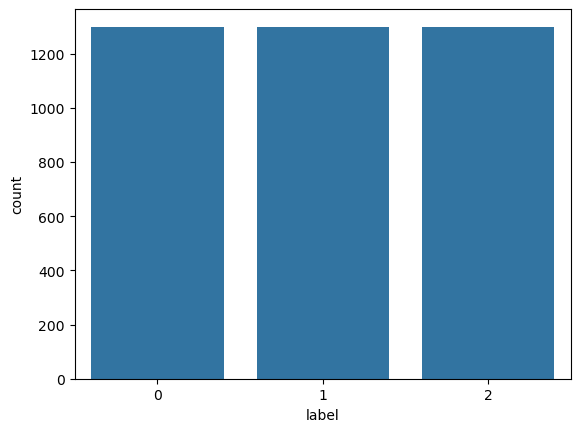

In [11]:
#CELL NO. 3
# CLASS DISTRIBUTION – check if dataset is balanced or not

# Labels:
# 0 - negative
# 1 - positive
# 2 - neutral

x=df_uaqte['label'].value_counts()
print(x)
sns.barplot(x=x.index, y=x)

In [12]:
#CELL NO. 4
#WORD-COUNT
print('Word Count:')
df_uaqte['word_count'] = df_uaqte['text'].apply(lambda x: len(str(x).split()))
print('\tPositive Comment/Text: ', df_uaqte[df_uaqte['label']==1]['word_count'].mean()) #Positive 
print('\tNegative Comment/Text: ', df_uaqte[df_uaqte['label']==0]['word_count'].mean()) #Negative
print('\tNeutral Comment/Text: ', df_uaqte[df_uaqte['label']==2]['word_count'].mean()) #Neutral 

#2. CHARACTER-COUNT
print('\nCharacter Count:')
df_uaqte['char_count'] = df_uaqte['text'].apply(lambda x: len(str(x)))
print('\tPositive Comment/Text: ', df_uaqte[df_uaqte['label']==1]['char_count'].mean()) #Positive 
print('\tNegative Comment/Text: ', df_uaqte[df_uaqte['label']==0]['char_count'].mean()) #Negative
print('\tNeutral Comment/Text: ', df_uaqte[df_uaqte['label']==2]['char_count'].mean()) #Neutral 


#3. UNIQUE WORD-COUNT
print('\nUnique Word Count:')
df_uaqte['unique_word_count'] = df_uaqte['text'].apply(lambda x: len(set(str(x).split())))
print('\tPositive Comment/Text: ', df_uaqte[df_uaqte['label']==1]['unique_word_count'].mean()) #Positive 
print('\tNegative Comment/Text: ', df_uaqte[df_uaqte['label']==0]['unique_word_count'].mean()) #Negative
print('\tNeutral Comment/Text: ', df_uaqte[df_uaqte['label']==2]['unique_word_count'].mean()) #Neutral 

Word Count:
	Positive Comment/Text:  53.326153846153844
	Negative Comment/Text:  29.056923076923077
	Neutral Comment/Text:  64.3576923076923

Character Count:
	Positive Comment/Text:  334.42846153846153
	Negative Comment/Text:  162.3830769230769
	Neutral Comment/Text:  426.43538461538463

Unique Word Count:
	Positive Comment/Text:  40.02538461538462
	Negative Comment/Text:  23.915384615384614
	Neutral Comment/Text:  49.494615384615386


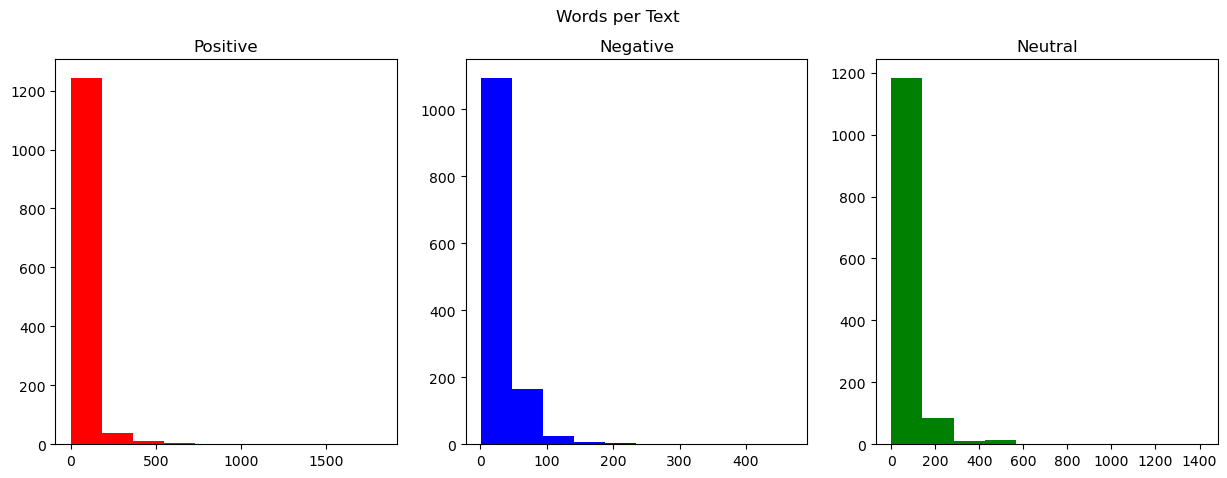

In [13]:
#CELL NO. 5
#Plotting word-count per label/category
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

#Plot for positive sentiments
train_words = df_uaqte[df_uaqte['label'] == 1]['word_count']
ax1.hist(train_words, color='red')
ax1.set_title('Positive')

#Plot for negative sentiments
train_words = df_uaqte[df_uaqte['label'] == 0]['word_count']
ax2.hist(train_words, color='blue')
ax2.set_title('Negative')

#Plot for neutral sentiments
train_words = df_uaqte[df_uaqte['label'] == 2]['word_count']
ax3.hist(train_words, color='green')
ax3.set_title('Neutral')

fig.suptitle('Words per Text')
plt.show()

<h1><b>PRE-PROCESSING</b></h1>
<br>
</t>Next cell demonstrates how to preprocess the dataset by removing punctuations & special characters, cleaning texts, removing stop words, and applying lemmatization

<h5>1. Simple Text Cleaning</h5>

In [16]:
#CELL NO. 6

#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string 

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Vincent\AppData\Local\Temp\ipykernel_10256\2448704128.py:12: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  #Remove extra space and tabs


In [17]:
#CELL NO.7

import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
# Get the list of stopwords for a specific language (e.g., English)
stopwords_list = stopwords.words('english')

# Print the list of stopwords
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
#CELL NO.8

# Define a list of common Tagalog stopwords
tagalog_stopwords = [
    'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at',
    'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil',
    'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa',
    'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag',
    'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong',
    'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan',
    'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag',
    'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang',
    'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring',
    'maging', 'mahusay', 'makita', 'marami', 'marapat', 'mga', 'minsan', 'mismo', 'mula',
    'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka',
    'narito', 'nasaan', 'ng', 'nga', 'ngayon', 'ni', 'nila', 'nilang', 'nito', 'niya',
    'niyang', 'noon', 'o', 'pa', 'paano', 'pababa', 'paggawa', 'pagitan', 'pagkakaroon',
    'pagkatapos', 'palabas', 'pamamagitan', 'panahon', 'pangalawa', 'para', 'paraan',
    'pareho', 'pataas', 'pero', 'pumunta', 'pumupunta', 'sa', 'saan', 'sabi', 'sabihin',
    'sarili', 'sila', 'sino', 'siya', 'tatlo', 'tayo', 'tulad', 'tungkol', 'una', 'walang',
    'ito', 'iyan'
]

# Print the list of Tagalog stopwords
print(tagalog_stopwords)

['ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka', 'narito', 'nasaan', 'ng', 'nga', 'ngayon', 'ni', 'nila', 'nilang', 'nito', 'niya', 'niyang', 'n

<h5>2. Lexicon-based Text Preprocessing</h5><br>
 a. Stopword removal - removing insignificant words from English vocabulary using nltk. A few such words are ‘i’,’you’,’a’,’the’,’he’,’which’ etc.
<br> b. Stemming - process of slicing the end or the beginning of words with the intention of removing affixes(prefix/suffix)
<br> c. Lemmatization - process of reducing the word to its base form

In [20]:
#CELL NO.9
#LEXICON-BASED TEXT PROCESSING EXAMPLES
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

#1. STOP WORDS REMOVAL
def stopword(string):
    english_stopwords = stopwords.words('english')
    combined_stopwords = english_stopwords + tagalog_stopwords
    
    words = [word for word in string.split() if word.lower() not in combined_stopwords]
    return ' '.join(words)

text=stopword(text)
print(text)

#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


<h5>Final Preprocessing on our Dataset</h5><br>
Applying all the preprocessing functions defined above to the data frame (df_uaqte / uaqte_balanced_dataset.csv) 

In [22]:
#CELL NO.10

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_uaqte['clean_text'] = df_uaqte['text'].apply(lambda x: finalpreprocess(x))

df_uaqte.head(10)

,platform-group,text,label,word_count,char_count,unique_word_count,clean_text
0,Youtube,ang problema ng mga stupedyante din kc nagmama...,0,37,227,34,problema stupedyante kc nagmamadali baka naman...
1,Youtube,Ano naman ngayon kung may panuntunang dapat su...,0,17,104,16,naman may panuntunang sundin lang deserve lng ...
2,Youtube,ANTITRINITARIAN sobrang mura na nga 50% pa.,0,7,43,7,antitrinitarian sobrang mura
3,Youtube,aquino gusto namin ang no or less tuition pero...,0,16,96,16,aquino less tuition stop announce worthy
4,Youtube,BKIT DI NINYO ISINAMA ANG NGA GURO NA MAARING ...,0,21,117,20,bkit di ninyo isinama guro maaring mging joble...
5,Youtube,Bakit di nyo yan ginawa nun panahon ni PNOY??,0,9,45,9,di nyo yan nun pnoy
6,Youtube,bakit kasi kelangan pa icategory\n\ndi nlng ga...,0,44,259,38,kasi kelangan icategory di nlng gawing libre t...
7,Youtube,Bakit nung kay pinoy di nila sinulong yan😂,0,8,42,8,nung kay pinoy di sinulong yan
8,Youtube,Bakit pa sya Sinabing State University or coll...,0,55,304,48,sya sinabing state university college free nam...
9,Youtube,dapat ang una cgurong gawin dito sa mga nais m...,0,35,183,31,cgurong gawin makakuha libreng tuition fee gov...


<h1>FEATURE EXTRACTION</h1>
Extracting vectors from text

<b>Splitting the dataset using 80:20 ratio. 80% as training set and 20% as test set</b>

In [25]:
#CELL NO.11

#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST

X_train, X_val, y_train, y_val = train_test_split(df_uaqte["clean_text"],
                                                  df_uaqte["label"],
                                                  test_size=0.2,
                                                  shuffle=True)

# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

print("DONE SPLITTING AND WORK TOKENIZING.")

DONE SPLITTING AND WORK TOKENIZING.


<b>Extracting features/ vectors using Bag-of-words(with Tf-
   Idf) and Word2Vec</b>
   

In [27]:
#CELL NO.12
# create Word2vec model

df_uaqte['clean_text_tok']=[nltk.word_tokenize(i) for i in df_uaqte['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_uaqte['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

print("DONE RUNNING.")

DONE RUNNING.


In [28]:
#CELL NO. 13

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec

# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 

#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

print("DONE CREATING VECTORS.")

DONE CREATING VECTORS.


<h1>TRAINING MODELS</h1>

<h3>Multinomial Logistic Regression with TF-IDF</h3>

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8076923076923077

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       250
           1       0.83      0.75      0.79       259
           2       0.84      0.79      0.82       271

    accuracy                           0.81       780
   macro avg       0.81      0.81      0.81       780
weighted avg       0.81      0.81      0.81       780

Confusion Matrix: 
 [[221  14  15]
 [ 39 195  25]
 [ 32  25 214]]


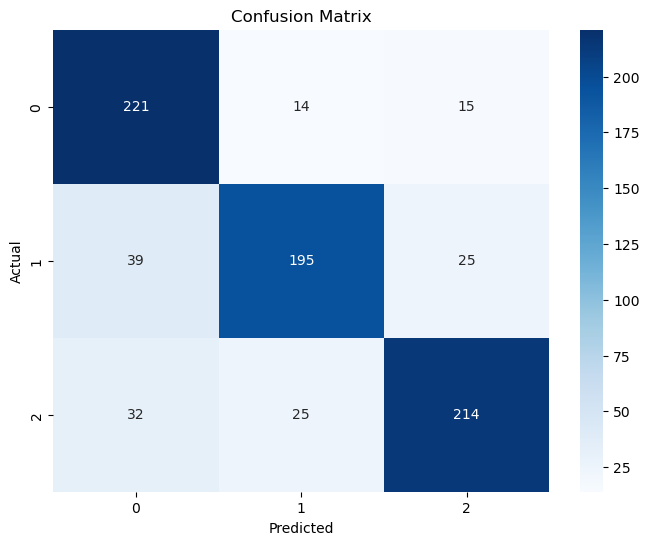

In [31]:
#CELL NO.14
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=1000)
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
 
#Generate confusion matrix
conf_matrix = confusion_matrix (y_val, y_predict)

#Print accuracy score and classification report
print('Accuracy: %s\n' % metrics.accuracy_score(y_predict, y_val))
print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',conf_matrix)
 
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lr_tfidf.classes_, yticklabels=lr_tfidf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h3>Naive Bayes with TF-IDF</h3>

Accuracy: 0.8

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       250
           1       0.82      0.77      0.79       259
           2       0.85      0.77      0.81       271

    accuracy                           0.80       780
   macro avg       0.80      0.80      0.80       780
weighted avg       0.80      0.80      0.80       780

Confusion Matrix: 
 [[216  16  18]
 [ 41 199  19]
 [ 33  29 209]]


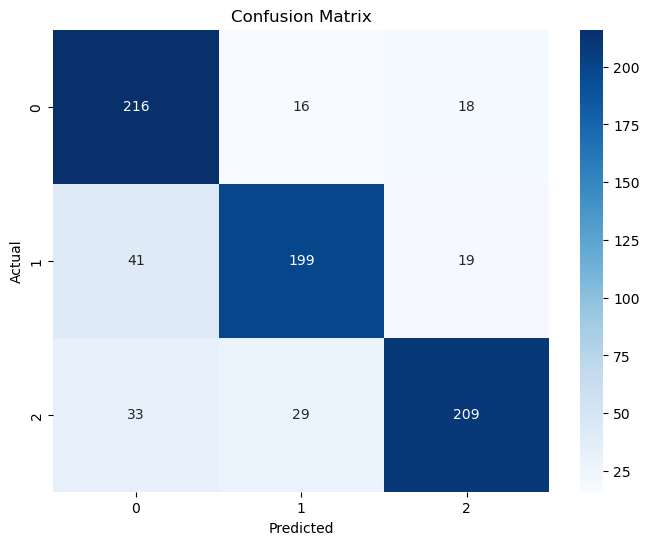

In [33]:
#CELL NO.14

#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
 
#Generate confusion matrix
conf_matrix = confusion_matrix (y_val, y_predict)

#Print accuracy score and classification report
print('Accuracy: %s\n' % metrics.accuracy_score(y_predict, y_val))
print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_tfidf.classes_, yticklabels=nb_tfidf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h3>Multinomial Logistic Regression with Word2Vec</h3>

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7397435897435898

              precision    recall  f1-score   support

           0       0.66      0.84      0.73       250
           1       0.83      0.66      0.74       259
           2       0.77      0.73      0.75       271

    accuracy                           0.74       780
   macro avg       0.75      0.74      0.74       780
weighted avg       0.75      0.74      0.74       780

Confusion Matrix: 
 [[209  18  23]
 [ 52 171  36]
 [ 58  16 197]]


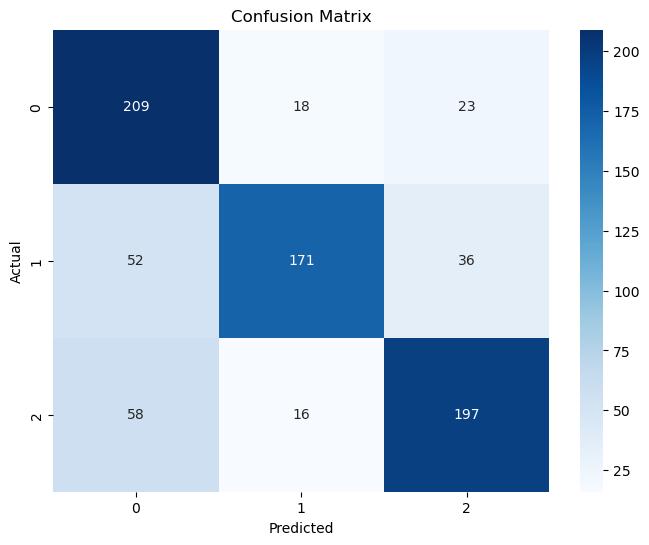

In [35]:
#CELL NO.15

#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=1000)
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)

#Generate confusion matrix
conf_matrix = confusion_matrix (y_val, y_predict)

#Print accuracy score and classification report
print('Accuracy: %s\n' % metrics.accuracy_score(y_predict, y_val))
print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lr_w2v.classes_, yticklabels=lr_w2v.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h3>Linear SVM with Word2Vec</h3>

Accuracy: 0.6307692307692307

              precision    recall  f1-score   support

           0       0.55      0.92      0.69       250
           1       0.92      0.35      0.50       259
           2       0.65      0.64      0.64       271

    accuracy                           0.63       780
   macro avg       0.71      0.63      0.61       780
weighted avg       0.71      0.63      0.61       780

Confusion Matrix: 
 [[229   2  19]
 [ 94  90  75]
 [ 92   6 173]]


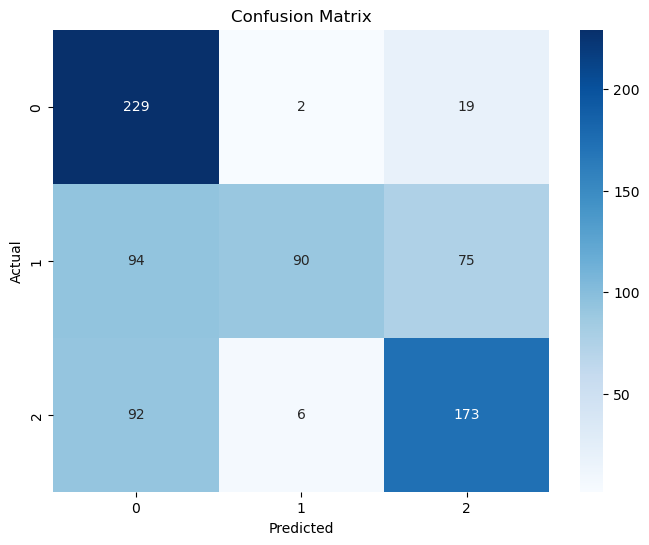

In [37]:
#CELL NO.16
#FITTING THE CLASSIFICATION MODEL using Linear SVM (W2v)
svm_w2v=sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=123, max_iter=5, tol=None)

svm_w2v.fit(X_train_vectors_w2v, y_train)#model

#Predict y value for test dataset
y_predict = svm_w2v.predict(X_val_vectors_w2v)

#Generate confusion matrix
conf_matrix = confusion_matrix (y_val, y_predict)

#Print accuracy score and classification report
print('Accuracy: %s\n' % metrics.accuracy_score(y_predict, y_val))
print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm_w2v.classes_, yticklabels=svm_w2v.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1>GENERATE PREDICTIONS USING THE BEST CLASSIFIER MODEL</h1>

In [39]:
#CELL NO.17

#Testing it on new dataset with the best model
df_test=pd.read_csv('make_predictions.csv')  #reading the data
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text']

X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['label']= y_predict

print(df_test.head())
final=df_test[['text','label']].reset_index(drop=True)
final.to_csv('submission.csv')

      platform-group                                               text  \
0  Facebook-REGION 5  Thank you so much sa CHEd at sa Kay Ms.Jocel L...   
1    Facebook-CARAGA  Hi po... Naa pabay chance na maapil as TES ben...   
2  Facebook-REGION 1  Hello ask ko po pano po mag apply ng scholarsh...   
3            Twitter  Nakakagigil yung scholar ka ng ched pero yung ...   
4            Twitter                       ched/unifast napakahassle mo   

                                          clean_text  predict_prob  label  
0  thank much ched kay m jocel labao regional foc...      0.774940      1  
1      hi po naa pabay chance maapil tes beneficiary      0.248446      0  
2  hello ask po pano po mag apply scholarship nd ...      0.470364      1  
3  nakakagigil yung scholar ched yung date pera s...      0.077050      0  
4                       ched unifast napakahassle mo      0.225729      0  
